In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Set dataset path
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
dataset_path = os.path.join(BASE_DIR, "dataset", "raw-img")

# Check if dataset exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset not found at {dataset_path}")

print("✅ Dataset found:", dataset_path)

# Define model save path
MODEL_DIR = os.path.join(os.path.dirname(os.getcwd()), "models")  # Moves up from scripts/
os.makedirs(MODEL_DIR, exist_ok=True)  # Ensure directory exists
print(MODEL_DIR)


✅ Dataset found: C:\Users\mar4u\Documents\DS-Test-2025\task2\dataset\raw-img
C:\Users\mar4u\Documents\DS-Test-2025\task2\models


In [3]:
# Load dataset
batch_size = 32
img_size = (224, 224)  # ResNet expects 224x224 images

# Split into train & validation sets
train_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Check class names
class_names = train_dataset.class_names
print("Classes:", class_names)


Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.
Classes: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


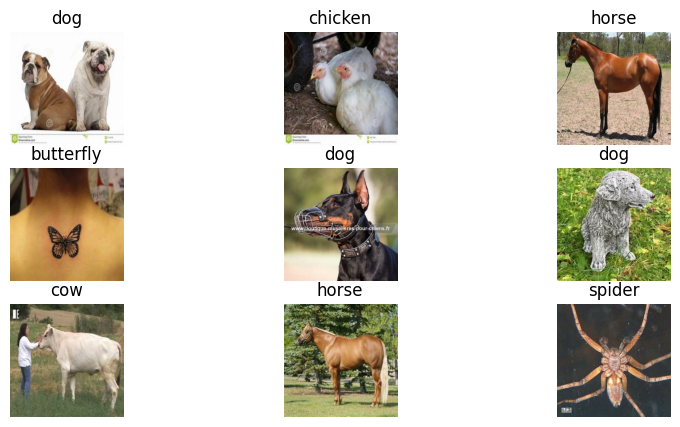

In [6]:
plt.figure(figsize=(10, 5))
for images, labels in train_dataset.take(1):  # Take 1 batch
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


In [4]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Load Pretrained Model (without top layers)
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

# Freeze base model layers (don't train them)
base_model.trainable = False

# Build new classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Flatten output
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Reduce overfitting
    layers.Dense(len(class_names), activation='softmax')  # Output layer
])

# Compile model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()  # Check architecture


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,114,826 (91.99 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [5]:
# Train the model
epochs = 10
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs
)


Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 1030s 2s/step - accuracy: 0.8128 - loss: 0.6221 - val_accuracy: 0.9330 - val_loss: 0.1965
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 974s 1s/step - accuracy: 0.9156 - loss: 0.2615 - val_accuracy: 0.9442 - val_loss: 0.1773
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 956s 1s/step - accuracy: 0.9294 - loss: 0.2150 - val_accuracy: 0.9393 - val_loss: 0.1851
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 992s 2s/step - accuracy: 0.9346 - loss: 0.2003 - val_accuracy: 0.9410 - val_loss: 0.1853
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 948s 1s/step - accuracy: 0.9391 - loss: 0.1794 - val_accuracy: 0.9463 - val_loss: 0.1831
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 971s 1s/step - accuracy: 0.9423 - loss: 0.1738 - val_accuracy: 0.9415 - val_loss: 0.1898
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 993s 2s/step - accuracy: 0.9493 - loss: 0.1572 - val_accuracy: 0.9484 - val_loss: 0.1944
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 981s 1s/step - accuracy: 0.9489 - loss: 0.1488 - val_acc

In [6]:
# Evaluate on validation set
val_loss, val_acc = model.evaluate(val_dataset)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


164/164 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.9477 - loss: 0.1963    
Validation Accuracy: 94.90%


In [15]:
# Save the model in the new location
model_path = os.path.join(MODEL_DIR, "animal_classifier.keras")  # Using new format
model.save(model_path)

print(f"✅ Model saved successfully at: {model_path}")

✅ Model saved successfully at: C:\Users\mar4u\Documents\DS-Test-2025\task2\models\animal_classifier.keras


✅ Image found: C:\Users\mar4u\Documents\DS-Test-2025\task2\test_img3.jpg
✅ Model loaded successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


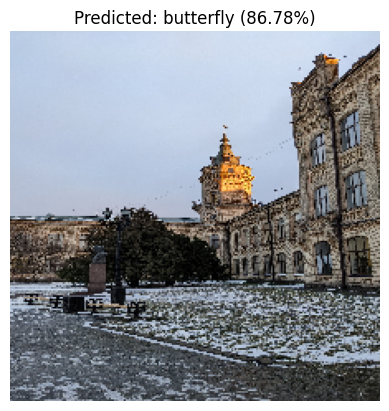

Prediction: butterfly (86.78%)


In [22]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and preprocess image
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
image_path = os.path.join(BASE_DIR, "test_img3.jpg")   # test image path
# Check if image exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Dataset not found at {image_path}")

print("✅ Image found:", image_path)

# Define the path to the saved model
model_path = os.path.join(BASE_DIR, "models", "animal_classifier.keras") 

# Load the trained model
model = tf.keras.models.load_model(model_path)
print("✅ Model loaded successfully!")

# Load and preprocess the image
img_size = (224, 224)  # Ensure it matches model input size
img = image.load_img(image_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values

# Make prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
confidence = np.max(predictions[0]) * 100

# Get predicted class name
predicted_class = class_names[predicted_class_index]

# Display the image with prediction result
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)")
plt.show()

# Print the prediction details
print(f"Prediction: {predicted_class} ({confidence:.2f}%)")